In [143]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
import plotly.figure_factory as ff
import sklearn

In [20]:
!pip install joblib==1.2.0

  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 0.15.1
    Uninstalling joblib-0.15.1:
      Successfully uninstalled joblib-0.15.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prince 0.7.1 requires scikit-learn>=0.22.1, but you have scikit-learn 0.22 which is incompatible.
You should consider upgrading via the 'c:\users\yash\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
data = pd.read_parquet('data/full_data.parquet')
data

,rtctime,lat,lon,target_temperature,feature_c,feature_ct,feature_motorspeed,ambient_temp,car_speed,soc
0,1672911588170,68.860123,18.346718,-4.281718,20.947325,-1.0,68.902439,-3.9,1.050000,84.199997
1,1672911588180,68.860123,18.346718,-4.281718,20.947325,-1.0,68.902439,-3.9,1.050000,84.199997
2,1672911588190,68.860123,18.346718,-4.281718,20.947325,-1.0,68.902439,-3.9,1.050000,84.199997
3,1672911588200,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.050000,84.199997
4,1672911588210,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.110000,84.199997
...,...,...,...,...,...,...,...,...,...,...
253665,1673371992330,64.251831,20.245625,52.802200,7.737465,6.0,3387.195122,-3.7,65.410004,51.000000
253666,1673371992340,64.251831,20.245625,52.802200,7.737465,6.0,3387.195122,-3.8,65.410004,51.000000
253667,1673371992350,64.251831,20.245625,52.802200,7.737465,6.0,3387.195122,-3.8,65.410004,51.000000
253668,1673371992360,64.251831,20.245625,52.802200,7.737465,6.0,3387.195122,-3.7,65.410004,51.000000


In [3]:
data = data.reset_index()
data.drop(['index'],1,inplace=True)
print('Before removing duplicates data shape: ',data.shape)
data = data.drop_duplicates(subset = ['rtctime'], keep = 'first')
print('After removing duplicates data shape: ',data.shape)
data = data.sort_values(by = 'rtctime', ascending = True)
data = data.reset_index()
data.drop(['index'],1,inplace=True)
data.head(10)

C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Before removing duplicates data shape:  (8159719, 10)
After removing duplicates data shape:  (8156409, 10)


C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,rtctime,lat,lon,target_temperature,feature_c,feature_ct,feature_motorspeed,ambient_temp,car_speed,soc
0,1672911588170,68.860123,18.346718,-4.281718,20.947325,-1.0,68.902439,-3.9,1.05,84.199997
1,1672911588180,68.860123,18.346718,-4.281718,20.947325,-1.0,68.902439,-3.9,1.05,84.199997
2,1672911588190,68.860123,18.346718,-4.281718,20.947325,-1.0,68.902439,-3.9,1.05,84.199997
3,1672911588200,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.05,84.199997
4,1672911588210,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.11,84.199997
5,1672911588220,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.11,84.199997
6,1672911588230,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.11,84.199997
7,1672911588240,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.11,84.199997
8,1672911588250,68.860123,18.346718,-4.281718,20.629015,-1.0,72.560976,-3.9,1.17,84.199997
9,1672911588260,68.860123,18.346718,-4.281718,20.629015,-1.0,72.560976,-3.9,1.17,84.199997


In [4]:
X = data.drop(['rtctime','lat','lon','target_temperature'],1)
y = data['target_temperature']
print('Independent features shape: ', X.shape, 'Target variable shape: ', y.shape)

Independent features shape:  (8156409, 6) Target variable shape:  (8156409,)


C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [5]:
r2_scores = []
error = []

In [6]:
rfr_model_load = joblib.load('models/rfr_model.joblib')
# if X_val.shape[1] != rfr_model_load.n_features_:
#     raise ValueError("The number of features in X_val doesn't match the model's expectations.")
val_pred = rfr_model_load.predict(X)
print("Random Forest R2 Score: ",np.round(r2_score(y, val_pred),2))
print("Random Forest Error: ", np.round(mean_squared_error(y, val_pred),2))
r2_scores.append(np.round(r2_score(y, val_pred),2))
error.append(np.round(mean_squared_error(y, val_pred),2))

Random Forest R2 Score:  0.8
Random Forest Error:  76.64


In [7]:
gbr_model_load = joblib.load('models/gbr_model.joblib')
# if X_val.shape[1] != rfr_model_load.n_features_:
#     raise ValueError("The number of features in X_val doesn't match the model's expectations.")
val_pred = gbr_model_load.predict(X)
print("Gradient Boosting R2 Score: ",np.round(r2_score(y, val_pred),2))
print("Gradient Bossting Error: ", np.round(mean_squared_error(y, val_pred),2))
r2_scores.append(np.round(r2_score(y, val_pred),2))
error.append(np.round(mean_squared_error(y, val_pred),2))

Gradient Boosting R2 Score:  0.92
Gradient Bossting Error:  29.34


In [8]:
print(r2_scores, error)

[0.8, 0.92] [76.64, 29.34]


In [9]:
X_diff = X.rolling(window=7, min_periods=7).mean()
X_diff = X_diff[7:]
y_diff = y[7:]
X_diff.head(10)

,feature_c,feature_ct,feature_motorspeed,ambient_temp,car_speed,soc
7,21.242899,-1.0,70.209059,-3.9,1.084286,84.199997
8,21.197426,-1.0,70.731707,-3.9,1.101429,84.199997
9,21.151953,-1.0,71.254355,-3.9,1.118571,84.199997
10,21.047366,-1.0,71.515679,-3.9,1.135714,84.199997
11,20.942778,-1.0,71.777003,-3.9,1.144286,84.199997
12,20.838190,-1.0,72.038328,-3.9,1.160000,84.199997
13,20.783623,-1.0,72.560976,-3.9,1.175714,84.199997
14,20.729055,-1.0,73.083624,-3.9,1.191429,84.199997
15,20.779076,-1.0,73.344948,-3.9,1.198571,84.199997
16,20.829096,-1.0,73.606272,-3.9,1.212857,84.199997


In [10]:
rfr_diff_load = joblib.load('models/rfr_model_diff.joblib')
# if X_val.shape[1] != rfr_model_load.n_features_:
#     raise ValueError("The number of features in X_val doesn't match the model's expectations.")
val_pred = rfr_diff_load.predict(X_diff)
print("Random Forest Difference Data R2 Score: ",np.round(r2_score(y_diff, val_pred),2))
print("Random Forest Difference Data Error: ", np.round(mean_squared_error(y_diff, val_pred),2))
r2_scores.append(np.round(r2_score(y_diff, val_pred),2))
error.append(np.round(mean_squared_error(y_diff, val_pred),2))

Random Forest Difference Data R2 Score:  0.8
Random Forest Difference Data Error:  76.73


In [11]:
gbr_diff_load = joblib.load('models/gbr_model_diff.joblib')
# if X_val.shape[1] != rfr_model_load.n_features_:
#     raise ValueError("The number of features in X_val doesn't match the model's expectations.")
val_pred = gbr_diff_load.predict(X_diff)
print("Random Forest Difference Data R2 Score: ",np.round(r2_score(y_diff, val_pred),2))
print("Random Forest Difference Data Error: ", np.round(mean_squared_error(y_diff, val_pred),2))
r2_scores.append(np.round(r2_score(y_diff, val_pred),2))
error.append(np.round(mean_squared_error(y_diff, val_pred),2))

Random Forest Difference Data R2 Score:  0.93
Random Forest Difference Data Error:  28.46


In [12]:
print(r2_scores, error)

[0.8, 0.92, 0.8, 0.93] [76.64, 29.34, 76.73, 28.46]


In [13]:
print(X.iloc[200])
for i in range(0,len(X),100):
    X.iloc[i] = X.iloc[i] * 0.75
    
X.iloc[200]

feature_c              18.560001
feature_ct             -1.000000
feature_motorspeed    158.536585
ambient_temp           -3.800000
car_speed               3.040000
soc                    84.199997
Name: 200, dtype: float64


feature_c              13.920000
feature_ct             -0.750000
feature_motorspeed    118.902439
ambient_temp           -2.850000
car_speed               2.280000
soc                    63.149998
Name: 200, dtype: float64

In [14]:
rfr_noisy_load = joblib.load('models/rfr_model_noisy.joblib')
# if X_val.shape[1] != rfr_model_load.n_features_:
#     raise ValueError("The number of features in X_val doesn't match the model's expectations.")
val_pred = rfr_noisy_load.predict(X)
print("Random Forest Difference Data R2 Score: ",np.round(r2_score(y, val_pred),2))
print("Random Forest Difference Data Error: ", np.round(mean_squared_error(y, val_pred),2))
r2_scores.append(np.round(r2_score(y, val_pred),2))
error.append(np.round(mean_squared_error(y, val_pred),2))

Random Forest Difference Data R2 Score:  0.8
Random Forest Difference Data Error:  78.97


In [15]:
gbr_noisy_load = joblib.load('models/gbr_model_noisy.joblib')
# if X_val.shape[1] != rfr_model_load.n_features_:
#     raise ValueError("The number of features in X_val doesn't match the model's expectations.")
val_pred = gbr_noisy_load.predict(X)
print("Random Forest Difference Data R2 Score: ",np.round(r2_score(y, val_pred),2))
print("Random Forest Difference Data Error: ", np.round(mean_squared_error(y, val_pred),2))
r2_scores.append(np.round(r2_score(y, val_pred),2))
error.append(np.round(mean_squared_error(y, val_pred),2))

Random Forest Difference Data R2 Score:  0.92
Random Forest Difference Data Error:  30.66


In [16]:
print(r2_scores, error)

[0.8, 0.92, 0.8, 0.93, 0.8, 0.92] [76.64, 29.34, 76.73, 28.46, 78.97, 30.66]


In [17]:
models = ['Random Forest Regressor', 'Gradient Boosting Regressor', 'Random Forest Diff', 'Gradient Boosting Diff', 'Random Forest Noisy', 'Gradient Boosting Noisy']

In [18]:
r2_scores

[0.8, 0.92, 0.8, 0.93, 0.8, 0.92]

In [19]:
error

[76.64, 29.34, 76.73, 28.46, 78.97, 30.66]

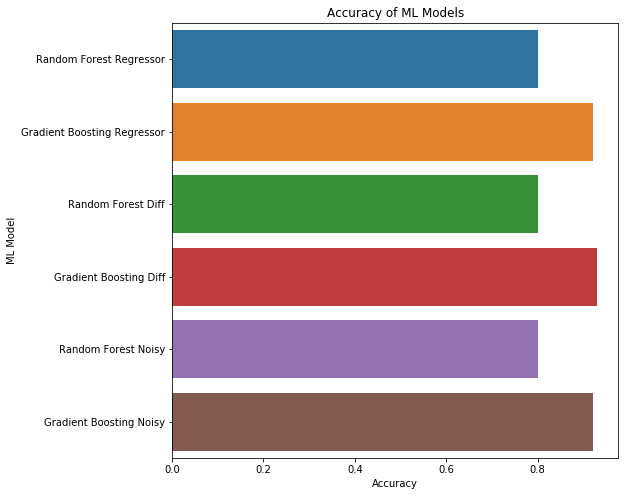

In [39]:
plt.figure(figsize = (8,8))
sns.barplot(r2_scores, models)
plt.title('Accuracy of ML Models')
plt.ylabel('ML Model')
plt.xlabel('Accuracy')
plt.show()

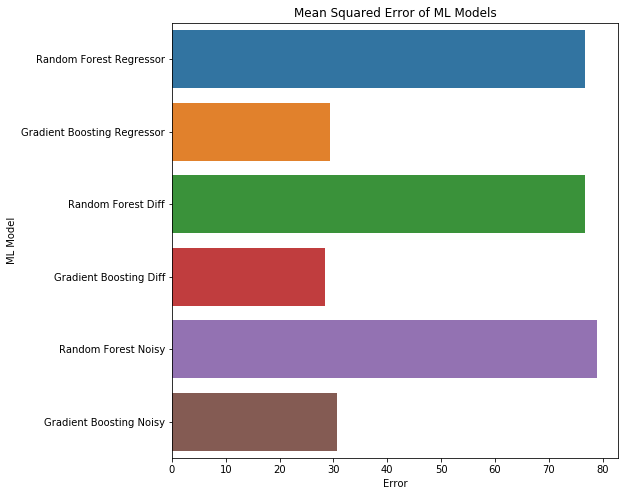

In [40]:
plt.figure(figsize = (8,8))
sns.barplot(error, models)
plt.title('Mean Squared Error of ML Models')
plt.ylabel('ML Model')
plt.xlabel('Error')
plt.show()

In [27]:
col_names = list(X.columns)
rfr_normal = rfr_model_load.feature_importances_
gbr_normal = gbr_model_load.feature_importances_
rfr_diff = rfr_diff_load.feature_importances_
gbr_diff = gbr_diff_load.feature_importances_
rfr_noisy = rfr_noisy_load.feature_importances_
gbr_noisy = gbr_noisy_load.feature_importances_

feature_importance_df = pd.DataFrame(zip(col_names, rfr_normal, gbr_normal, rfr_diff, gbr_diff, rfr_noisy, gbr_noisy),
                                    columns = ['columns', 'rfr', 'gbr', 'rf_diff', 'gb_diff', 'rf_noisy', 'gb_noisy'])
feature_importance_df

,columns,rfr,gbr,rf_diff,gb_diff,rf_noisy,gb_noisy
0,feature_c,0.000000,0.002554,0.000000,0.002507,0.000000,0.002340
1,feature_ct,0.627597,0.561182,0.627723,0.560287,0.630249,0.561214
2,feature_motorspeed,0.031509,0.024552,0.031495,0.019365,0.031115,0.019601
3,ambient_temp,0.072171,0.117893,0.072200,0.117927,0.072236,0.114748
4,car_speed,0.187062,0.177411,0.187231,0.181902,0.186691,0.185637
5,soc,0.081661,0.116408,0.081351,0.118011,0.079709,0.116460


In [105]:
data_new = pd.read_parquet('data/3.parquet')
data1 = data_new[200000:220000]
data1 = data1.reset_index()
data1.drop(['index'],1,inplace=True)

C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [106]:
# plt.figure(figsize=(18,8))
# # plt.plot(data1.feature_ct, color = 'blue')
# # plt.plot(data1.car_speed, color = 'red')
# # plt.plot(data1.target_temperature, color = 'green')
# plt.plot(data1.soc, color = 'blue')
# # plt.ylim(ymin=0)
# plt.legend()
# plt.show()

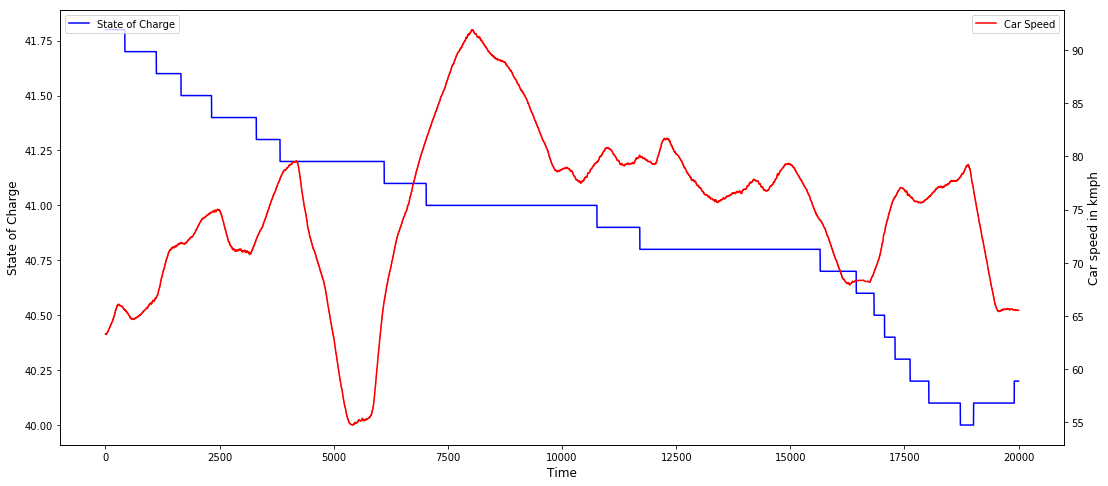

In [107]:
fig, ax1 = plt.subplots(figsize=(18,8))
ax1.plot(data1['soc'], color = 'blue')
ax1.tick_params(axis = 'y')
ax2 = ax1.twinx()
ax2.plot(data1['car_speed'], color = 'red')
ax2.tick_params(axis = 'y')
ax1.set_ylabel('State of Charge', size = 12)
ax2.set_ylabel('Car speed in kmph', size = 12)
ax1.set_xlabel('Time', size = 12)
# plt.title('', size = 14)
plt.legend(['Car Speed'], loc = 'upper right')
ax1.legend(['State of Charge'], loc = 'upper left')
plt.show()

In [108]:
data_new.to_csv('data/user_data.csv',index = False)

In [121]:
data1 = pd.read_parquet('data/1.parquet')
data3 = pd.read_parquet('data/3.parquet')
data5 = pd.read_parquet('data/5.parquet')
data6 = pd.read_parquet('data/6.parquet')
data7 = pd.read_parquet('data/7.parquet')

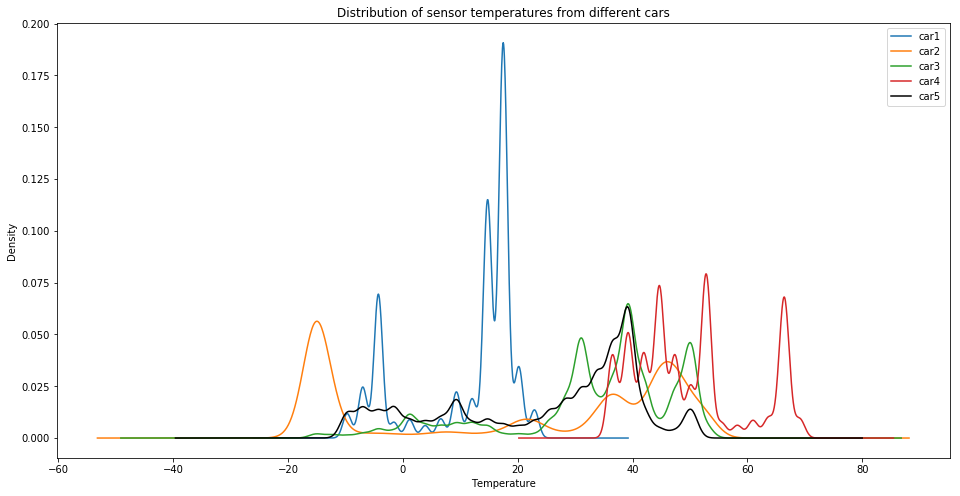

In [125]:
plt.figure(figsize=(16,8))
data1['target_temperature'].plot(kind = 'kde')
data3['target_temperature'].plot(kind = 'kde')
data5['target_temperature'].plot(kind = 'kde')
data6['target_temperature'].plot(kind = 'kde')
data7['target_temperature'].plot(kind = 'kde', color = 'k')
plt.xlabel('Temperature')
plt.title('Distribution of sensor temperatures from different cars')
plt.legend(['car1','car2','car3','car4','car5'])
plt.show()

# hist_data = [data1['target_temperature'], data3['target_temperature'], data5['target_temperature']]
# group_labels = ['Car 1', 'Car 2', 'Car 3']
# colors = ['#333F44', '#37AA9C', '#94F3E4']

# # Create distplot with curve_type set to 'normal'
# fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)

# # Add title
# fig.update_layout(title_text='Curve and Rug Plot')
# fig.show()

In [139]:
user_input = [[10.0, 1.0, 3000.00, -4.0, 100.90, 39.80]]
user_input = pd.DataFrame(user_input, columns = ['feature_c', 'feature_ct', 'feature_motorspeed','ambient_temp','car_speed','soc'])
user_input

,feature_c,feature_ct,feature_motorspeed,ambient_temp,car_speed,soc
0,10.0,1.0,3000.0,-4.0,100.9,39.8


In [140]:
np.max(data.target_temperature), np.min(data.target_temperature)

(93.57642765298466, -28.74625462767236)

In [147]:
val_pred = gbr_noisy_load.predict(user_input)
np.round(val_pred,2)

array([48.05])

In [146]:
sklearn.__version__

'0.22'